# 회귀, Regression
- 딥러닝 ==> 매우 많은 1차 방정식의 모음

In [3]:
import torch 
import torch.nn as nn                # 신경망을 만드는 클래스
import torch.optim as optim          # 학습을 원활하게 도와주는 도구
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# device 설정 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
print(f'현재 사용중인 Device : {device}')


# 데이터 가져오기
tips = sns.load_dataset('tips').dropna()

# 데이터 분리
X = tips[['total_bill', 'size']].values           # 두 변수
y = tips['tip'].values.astype(np.float32)         # 회귀 대상 

# 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape
# 스케일링, 필수가 아니다. 각 변수의 성격을 잘 봐야 한다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tensor 변환 : PyTorch 프레임워크에 입력값으로 내가 추가를 하겠다. 형변환 필수
# 이 때, 형변환 진행할 때, device 같이 입력
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)


# 회귀 모형 정의
# 텐서 플로에서는 입문자분들이 굳이 클래스 만들 필요 없음
# 파이토치는 무조건 클래스를 만들어야 함. 
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1) # 독립변수의 갯수, 1개 출력

    def forward(self, x):
        return self.linear(x)         # 선형변환

# 모델 초기화
model = RegressionModel().to(device) # GPU 회귀 모형 사용
criterion = nn.MSELoss()                            # 평균 제곱 오차 손실 함수 (Loss Function)
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam 최적화 알고리즘

# 위 두개념은 경사하강법에서 출발
# ML의 예시 : LightGBM, XGBoost, CatBoost
# 행렬곱셈 ==> 미분/적분 ==> 경사하강법을 이해할 수 있는 기본 토대

# 모델 학습
epochs = 1000
for epoch in range(epochs): 
    model.train()          # 학습 모드 
    optimizer.zero_grad()  # 그래디언트 초기화 
    outputs = model(X_train_tensor)  # 순전파
    loss = criterion(outputs, y_train_tensor) # 평가지표 계산
    loss.backward() # 역전파
    optimizer.step() # 파라미터(기울기, 절편) 업데이트, 행렬로 저장
    
    # 100 에포크마다 진행상황 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

현재 사용중인 Device : cuda
Epoch [100/1000], Loss: 3.3795
Epoch [200/1000], Loss: 1.7824
Epoch [300/1000], Loss: 1.2623
Epoch [400/1000], Loss: 1.1380
Epoch [500/1000], Loss: 1.1169
Epoch [600/1000], Loss: 1.1143
Epoch [700/1000], Loss: 1.1141
Epoch [800/1000], Loss: 1.1141
Epoch [900/1000], Loss: 1.1141
Epoch [1000/1000], Loss: 1.1141


250604

# 분류

In [4]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import seaborn as sns 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder 

# 1. 데이터 가져오기 
tips = sns.load_dataset('tips').dropna()

# 2. 특성(X), 타겟(y) 설정
X = tips[['total_bill', 'tip', 'size']].values
le = LabelEncoder()
y = le.fit_transform(tips['day'])  # Thur = 3, Fri = 0, Sat = 2, Sun = 1

# 3. 훈련/테스트 분할 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 텐서변환
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Tensor 변환 : PyTorch 프레임워크에 입력값으로 내가 추가를 하겠다. 형변환 필수
# 이 때, 형변환 진행할 때, device 같이 입력
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# 6. 모델 정의
class ClassificationModel(nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        # self.linear = nn.Linear(2, 1)   # 입력변수 2개, 출력값 1개
        self.linear = nn.Linear(3, 4)     # 입력변수 3개, 출력값 4개

    def forward(self, x):
        return self.linear(x) # CrossEntropyLoss 활용, softmax 자동 계산됨

# 7. 모델 초기화
model = ClassificationModel().to(device)
criterion = nn.CrossEntropyLoss() # softmax 자동 계산됨
optimizer = optim.Adam(model.parameters(), lr=0.01) 

# 8. 학습
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # 정확도 같이 들어가야 하나, 기존 코드와 유지 시키려고 생략)
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 9. 평가
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    accuracy = correct / y_test_tensor.size(0)
    print(accuracy)

Epoch [50/300], Loss: 1.2744
Epoch [100/300], Loss: 1.2456
Epoch [150/300], Loss: 1.2397
Epoch [200/300], Loss: 1.2376
Epoch [250/300], Loss: 1.2366
Epoch [300/300], Loss: 1.2362
0.3469387755102041


# PyTorch 다중분류

In [5]:
# 필요한 라이브러리 임포트
import torch  # PyTorch 딥러닝 프레임워크
import torch.nn as nn  # 신경망 모듈
import torch.optim as optim  # 최적화 알고리즘
from sklearn.preprocessing import LabelEncoder, StandardScaler  # 데이터 전처리 도구
from sklearn.model_selection import train_test_split  # 데이터 분할
import pandas as pd  # 데이터 처리
import matplotlib.pyplot as plt

def mapk(actual, predicted, k=3):
    """
    actual: (N,) numpy array, 정답 인덱스
    predicted: (N, k) numpy array, 각 row별로 상위 k개 예측 인덱스
    """
    score = 0.0
    for a, p in zip(actual, predicted):
        try:
            idx = list(p).index(a)
            score += 1.0 / (idx + 1)
        except ValueError:
            continue
    return score / len(actual)

In [6]:
# 학습 데이터 가져오기 
df = pd.read_csv("kaggle/train.csv")
df.head(1)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28


In [7]:
df['Fertilizer Name'].value_counts() # 다중분류모형

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

In [8]:
# 인코딩 변환 
le_soil = LabelEncoder() # 토양 타입 인코더
le_crop = LabelEncoder() # 작물 타입 인코더
le_target = LabelEncoder() # 비료 이름 인코더 

# 범주형 변수들을 숫자로 변환 
df['Soil Type'] = le_soil.fit_transform(df['Soil Type']) # 숫자로 변환 
df['Crop Type'] = le_crop.fit_transform(df['Crop Type']) # 숫자로 변환 
df['Fertilizer Name'] = le_target.fit_transform(df['Fertilizer Name']) # 숫자로 변환 

df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,1,8,36,4,5,4
1,1,27,69,65,4,4,30,6,18,4
2,2,29,63,32,4,4,24,12,16,2
3,3,35,62,54,4,0,39,12,4,0
4,4,35,58,43,3,6,37,2,16,5


In [9]:
# 입력 특성과 타겟 변수 분리 
features = df.drop(columns=['id', 'Fertilizer Name']) # id와 타겟변수 제외한 특성
target = df['Fertilizer Name'] # 타겟변수 

# 특성 스케일링 (정규화)
scaler = StandardScaler() # 표준화 스케일러 생성 
features_scaled = scaler.fit_transform(features) # 특성 정규화

## 학습 검증 데이터 분리

In [10]:
# 학습/검증 데이터 분할 (80:20)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600000, 8), (150000, 8), (600000,), (150000,))

# 텐서변환 & GPU 사용

In [11]:
# GPU 사용 가능 여부에 따라 device 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터를 PyTorch 텐서로 변환하고 device로 이동
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)  # 학습 데이터
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)  # 학습 타겟
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)  # 검증 데이터
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)  # 검증 타겟

# 신경망 모델 정의

In [12]:
class FertilizerNet(nn.Module): 
    def __init__(self, input_dim, output_dim):
        super(FertilizerNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)          # 첫번째 연결층
        self.relu = nn.ReLU()                        # 활성화 함수
        self.fc2 = nn.Linear(32, 16)                 # 두번째 연결층
        self.out = nn.Linear(16, output_dim)         # 출력층 

    def forward(self, x):
        x = self.relu(self.fc1(x))                    # 첫번째 층 통과
        x = self.relu(self.fc2(x))                    # 두번째 층 통과 
        x = self.out(x)                               # 출력층 통과 
        return x

In [17]:
# 모델 초기화
input_dim = X_train_tensor.shape[1]     # 입력 특성의 차원    
output_dim = len(le_target.classes_)    # 출력 클래스의 수

# input_dim, output_dim
model = FertilizerNet(input_dim, output_dim).to(device)   # 모델 생성, GPU로 연산 준비
criterion = nn.CrossEntropyLoss()                         # 교차 엔트로피 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)       # Adam 최적화 알고리즘

## 모델학습

In [14]:
epochs = 100                # 전체 학습 횟수
train_losses = []
val_losses = []
train_maps = []
val_maps = []

for epoch in range(epochs):
    model.train()                    # 학습 모드
    outputs = model(X_train_tensor)  # 순전파
    loss = criterion(outputs, y_train_tensor) # 손실 계산 
    optimizer.zero_grad()            # 그래디언트 초기화 
    loss.backward()                  # 역전파
    optimizer.step()                 # 파라미터 업데이트
    train_losses.append(loss.item()) # 손실 계산 집계 

    # MAP@3 
    # train MAP@3
    with torch.no_grad():
        train_probs = torch.softmax(outputs, dim=1)
        # 각 샘플에 대해 상위 3개 클래스의 인덱스를 추출하고 CPU로 이동한 후 NumPy 배열로 변환
        train_top3 = torch.topk(train_probs, k=3, dim=1).indices.cpu().numpy()
        train_map = mapk(y_train_tensor.cpu().numpy(), train_top3, k=3)
        train_maps.append(train_map)

    # validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())
        val_probs = torch.softmax(val_outputs, dim=1)
        val_top3 = torch.topk(val_probs, 3, dim=1).indices.cpu().numpy()
        val_map = mapk(y_test_tensor.cpu().numpy(), val_top3, k=3)
        val_maps.append(val_map)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train MAP@3: {train_map:.4f}, Val MAP@3: {val_map:.4f}")
 

Epoch [10/100], Loss: 1.9420, Val Loss: 1.9420, Train MAP@3: 0.2829, Val MAP@3: 0.2804
Epoch [20/100], Loss: 1.9416, Val Loss: 1.9417, Train MAP@3: 0.2844, Val MAP@3: 0.2825
Epoch [30/100], Loss: 1.9412, Val Loss: 1.9414, Train MAP@3: 0.2863, Val MAP@3: 0.2837
Epoch [40/100], Loss: 1.9409, Val Loss: 1.9412, Train MAP@3: 0.2870, Val MAP@3: 0.2847
Epoch [50/100], Loss: 1.9405, Val Loss: 1.9410, Train MAP@3: 0.2873, Val MAP@3: 0.2848
Epoch [60/100], Loss: 1.9402, Val Loss: 1.9408, Train MAP@3: 0.2876, Val MAP@3: 0.2855
Epoch [70/100], Loss: 1.9398, Val Loss: 1.9405, Train MAP@3: 0.2882, Val MAP@3: 0.2854
Epoch [80/100], Loss: 1.9396, Val Loss: 1.9404, Train MAP@3: 0.2885, Val MAP@3: 0.2856
Epoch [90/100], Loss: 1.9394, Val Loss: 1.9402, Train MAP@3: 0.2889, Val MAP@3: 0.2855
Epoch [100/100], Loss: 1.9392, Val Loss: 1.9401, Train MAP@3: 0.2892, Val MAP@3: 0.2859


In [15]:
# 입력값 : sepal_length, sepal_width
# 출력값 : setosa, versicolor, virginica
# 입력값 : 3, 5 ==> setosa 라고 예측
# softmax() 함수 사용하면 3, 5 =>
## setosa 일 확률 51%, versicolor 일 확률 40%, virginica 9%

submission.csv 파일이 생성되었습니다.


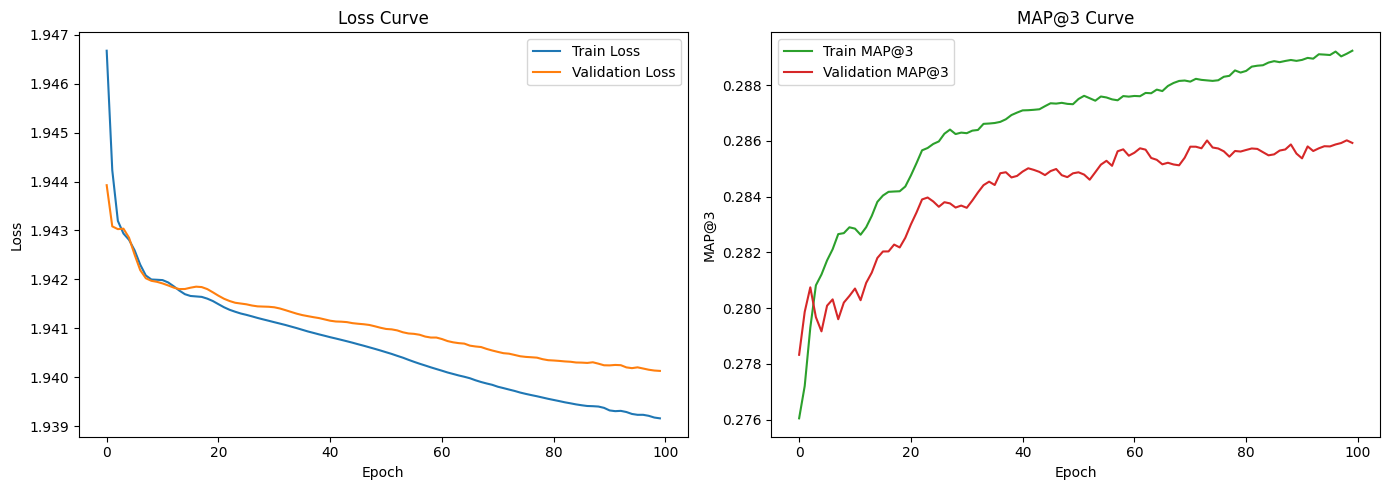

In [16]:
# 모델 평가
model.eval()  # 평가 모드
with torch.no_grad():  # 그래디언트 계산 비활성화
    test_outputs = model(X_test_tensor)  # 테스트 데이터 예측
    _, predicted = torch.max(test_outputs, 1)  # 가장 높은 확률의 클래스 선택
    accuracy = (predicted == y_test_tensor).float().mean().item()  # 정확도 계산

# 테스트 데이터 전처리
test_df = pd.read_csv("kaggle/test.csv")  # 테스트 데이터 로드
test_df['Soil Type'] = le_soil.transform(test_df['Soil Type'])  # 토양 타입 변환
test_df['Crop Type'] = le_crop.transform(test_df['Crop Type'])  # 작물 타입 변환
test_features = test_df.drop(columns=['id'])  # id 제외
test_features_scaled = scaler.transform(test_features)  # 특성 정규화
X_test_final = torch.tensor(test_features_scaled, dtype=torch.float32).to(device)  # 텐서 변환

# 최종 예측
model.eval()
with torch.no_grad():
    outputs = model(X_test_final)  # 예측
    probs = torch.softmax(outputs, dim=1)  # 확률로 변환
    top3 = torch.topk(probs, 3, dim=1).indices.cpu().numpy()  # 상위 3개 클래스 선택

# 예측 결과를 원래 레이블로 변환
top3_labels = le_target.inverse_transform(top3.flatten()).reshape(top3.shape)

# 제출 파일 생성
submission = pd.DataFrame({
    'id': test_df['id'],
    'Fertilizer Name': [' '.join(row) for row in top3_labels]  # 각 행의 예측값을 공백으로 구분하여 결합
})
submission.to_csv('kaggle/submission_1536.csv', index=False)  # CSV 파일로 저장
print("submission.csv 파일이 생성되었습니다.")

# 1x2 subplot 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# 왼쪽: 손실 곡선
axes[0].plot(train_losses, label='Train Loss', color='tab:blue')
axes[0].plot(val_losses, label='Validation Loss', color='tab:orange')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curve')
axes[0].legend()
# 오른쪽: MAP@3 곡선
axes[1].plot(train_maps, label='Train MAP@3', color='tab:green')
axes[1].plot(val_maps, label='Validation MAP@3', color='tab:red')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAP@3')
axes[1].set_title('MAP@3 Curve')
axes[1].legend()
plt.tight_layout()
plt.savefig('loss_map_curve_1x2.png')
plt.show()